In [1]:
# importing all the important libraries 
import pandas as pd
import numpy as np

In [2]:
#now i have loaded my dta
data=pd.read_csv("all_data/iris.data")

In [3]:
#i am seeing my first five elements of the data
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
#i am seeing random 5 elements from my data
data.sample(5)

,5.1,3.5,1.4,0.2,Iris-setosa
32,5.5,4.2,1.4,0.2,Iris-setosa
30,5.4,3.4,1.5,0.4,Iris-setosa
56,4.9,2.4,3.3,1.0,Iris-versicolor
25,5.0,3.4,1.6,0.4,Iris-setosa
39,5.0,3.5,1.3,0.3,Iris-setosa


In [5]:
# now i am inserting column names in my data
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('all_data/iris.data', header=None, names=column_names)

In [6]:
# showing my data
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#import sklearn for converting categorical data into numerical daata
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'species' column
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Drop the original 'species' column
df.drop('species', axis=1, inplace=True)

# Display the updated DataFrame
df


,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# i have change the iris-flower name into 0 , 1 and 2 ....
here Iris-setosa --> 0
Iris-versicolor ---> 1
Iris-virginica ---->2

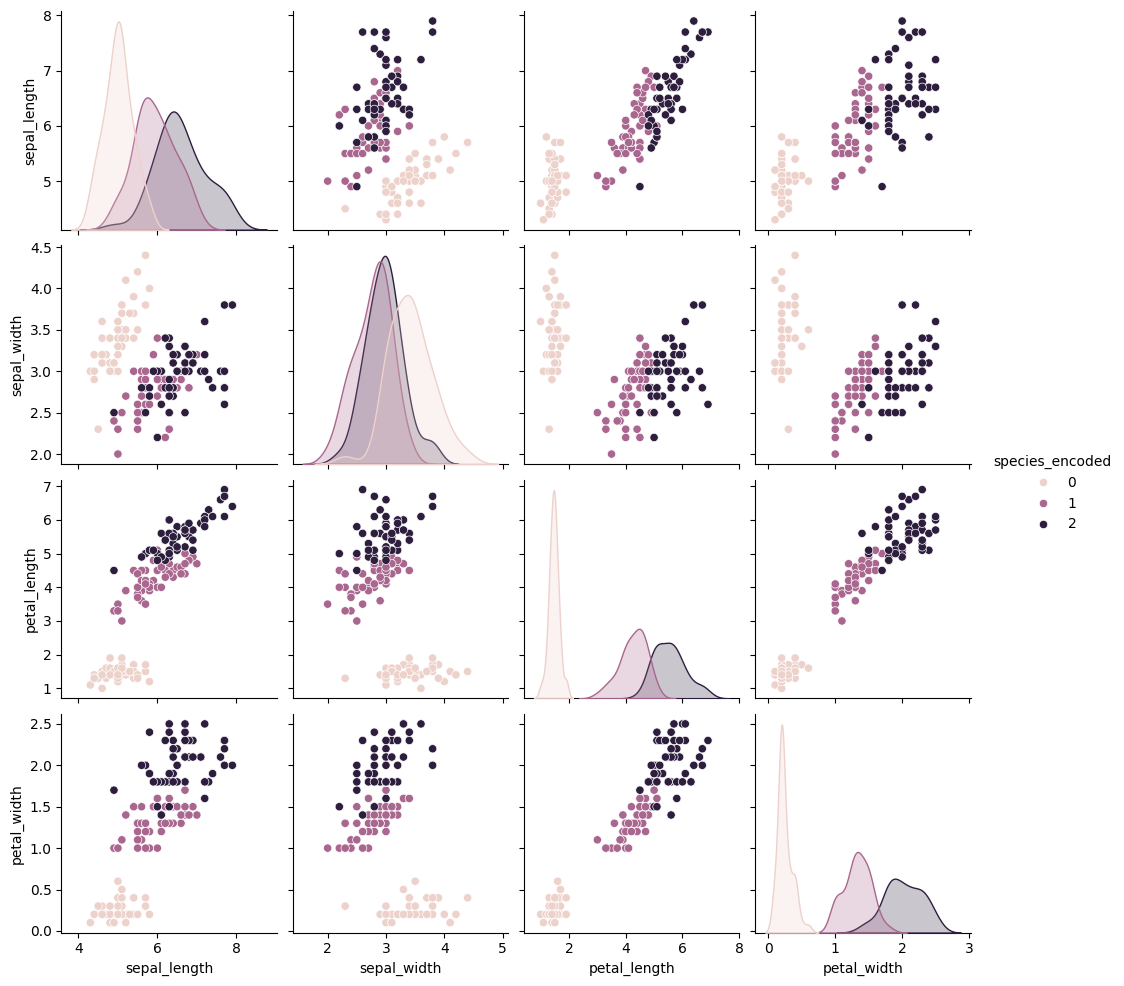

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features and species
sns.pairplot(df, hue='species_encoded')
plt.show()


The pair plot provides a comprehensive visualization of the relationships between the features in the dataset. It shows scatter plots for feature pairs, giving an idea of how they correlate with each other. The diagonal elements display the distribution of individual features through histograms. For instance, we observe that sepal_length and sepal_width seem to have a relatively weak correlation, while petal_length and petal_width demonstrate a stronger linear relationship. The color coding highlights the species, helping identify distinct clusters for each species.

/tmp/ipykernel_4249/164813187.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='species_encoded', y=feature, data=df, ci='sd')


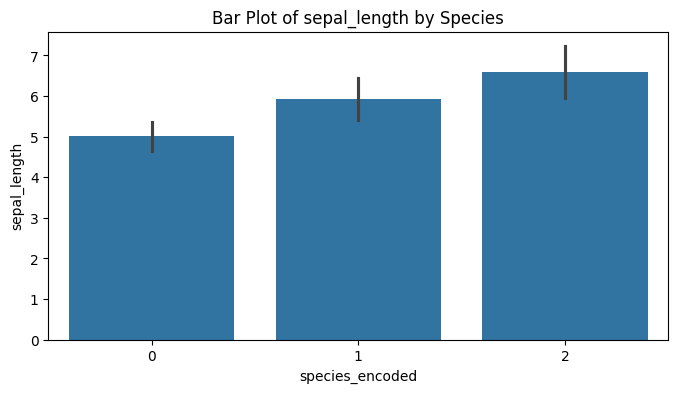

/tmp/ipykernel_4249/164813187.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='species_encoded', y=feature, data=df, ci='sd')


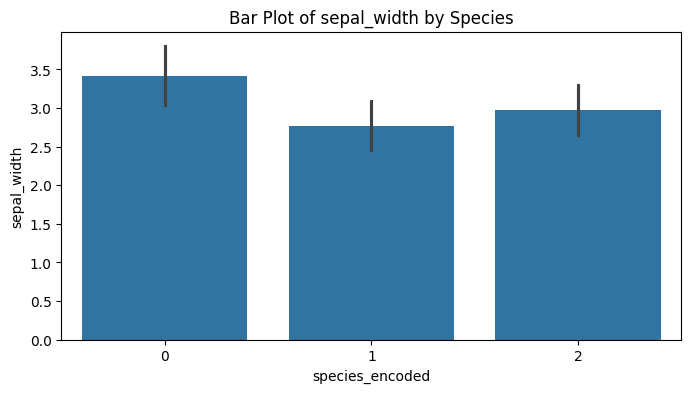

/tmp/ipykernel_4249/164813187.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='species_encoded', y=feature, data=df, ci='sd')


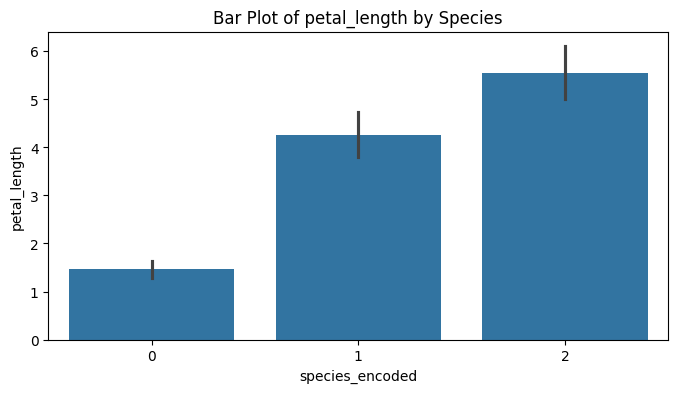

/tmp/ipykernel_4249/164813187.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='species_encoded', y=feature, data=df, ci='sd')


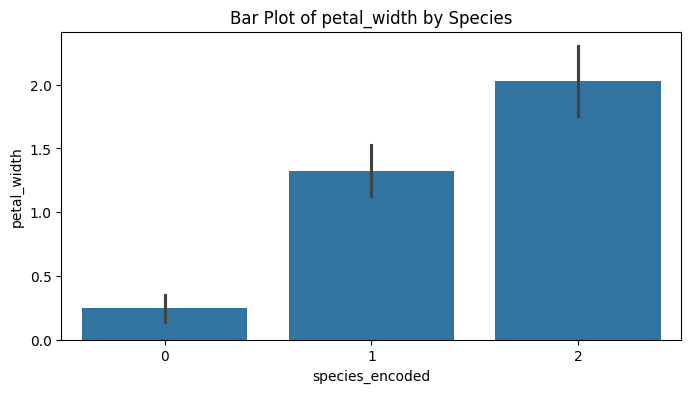

In [9]:
for feature in df.columns[:-1]:  # Skipping the encoded target column
    plt.figure(figsize=(8, 4))
    sns.barplot(x='species_encoded', y=feature, data=df, ci='sd')
    plt.title(f'Bar Plot of {feature} by Species')
    plt.show()


In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display correlation of each feature with the target variable ('species_encoded')
target_correlation = correlation_matrix['species_encoded'].sort_values(ascending=False)

# Print the correlations
print(target_correlation)

# hello


species_encoded    1.000000
petal_width        0.956464
petal_length       0.949043
sepal_length       0.782561
sepal_width       -0.419446
Name: species_encoded, dtype: float64


#from this correlation matrix we can understand that all the variables have highly correlated with specie_encoded
#now we can see the heatmap 

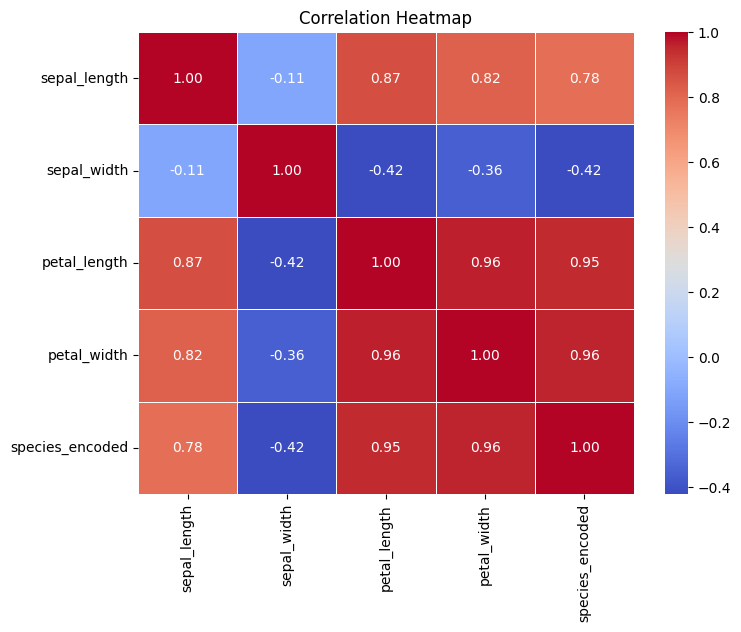

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


#this is the heatmap of correlation matrix here red colour denote the highly correlated feature and light blue denote the less correlated feature and highly blue denote the very less correlated feature.

In [12]:
#showing  the data
df

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
#showing the description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     150 non-null    float64
 1   sepal_width      150 non-null    float64
 2   petal_length     150 non-null    float64
 3   petal_width      150 non-null    float64
 4   species_encoded  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#We have done all these so that we can visualize the dataset , now we can see that all the features are important , hence we cannot drop any feature and also by using labelencoder i have change the specie column to specie_encoder so that we can easily find out how much all the feature correlate with this .

In [14]:
#here in x variable i an inserting all the features other than target variable , and in y variable i am inserting the target variable
x = df.iloc[:, 0:3]
y=  df.iloc[:,4:]


In [15]:
x.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [16]:
y.head()

,species_encoded
0,0
1,0
2,0
3,0
4,0


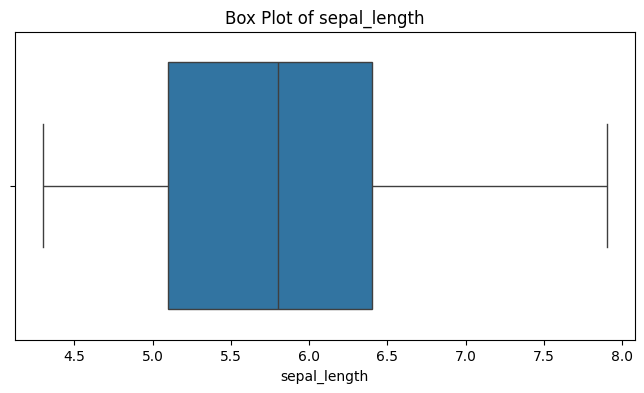

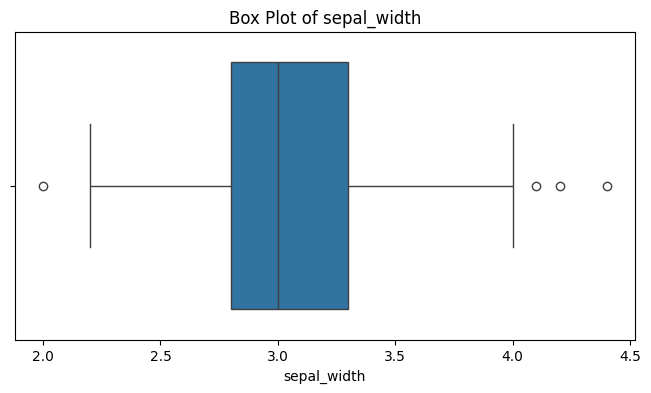

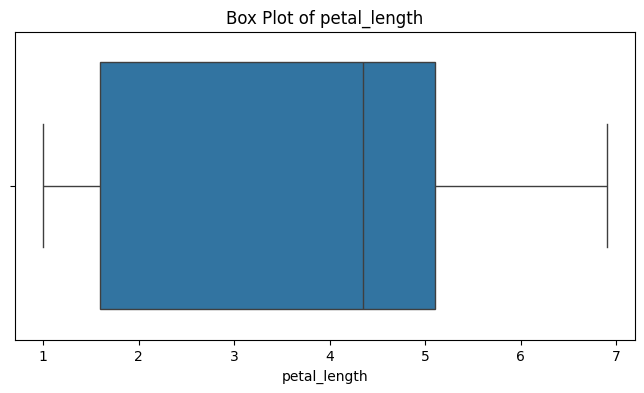

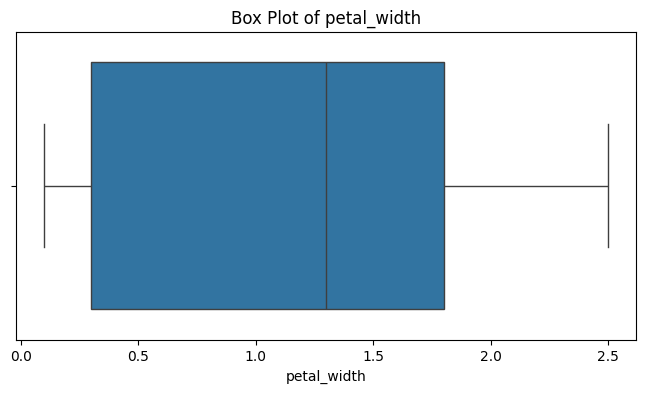

In [17]:
#here i am trying to find if there is any outlier
import matplotlib.pyplot as plt
import seaborn as sns

# For each feature
for feature in df.columns[:-1]:  # Assuming the last column is the target
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

#we can see in the box_plot of sepal_width that there are three outliers, now we have to remove all these outliers

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data, removing outliers in 'sepal_width'
df_filtered = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]

# Check the new dataset shape
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)


Original DataFrame shape: (150, 5)
Filtered DataFrame shape: (146, 5)


In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
# Assuming 'species_encoded' is the target variable
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']


In [21]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [22]:
# Create a pipeline that first scales the data, then fits the model
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform cross-validation
scores = cross_val_score(model, x, y, cv=skf, scoring='accuracy')

# Print the accuracy scores for each fold
#print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean()*100)


Mean accuracy: 95.33333333333334


In [23]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming you have already split your data into 'x' and 'y'
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model on the entire dataset after cross-validation
model.fit(x, y)

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    # Create an array with the user's input
    user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Make the prediction
    prediction = model.predict(user_input)
    
    # Return the predicted species
    return prediction[0]

# Example usage:
# Input the data in one line using a tuple
features = (6.9,3.1,5.1,2.3)

# Predict species using the tuple
predicted_species = predict_species(*features)

# Check which species it corresponds to
if predicted_species == 0:
    print("Iris-setosa")
elif predicted_species == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")



Iris-virginica


/home/shrey/IrisFlowerClassification/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
# Access the logistic regression model inside the pipeline
log_reg = model.named_steps['logisticregression']
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)


Coefficients: [[-1.07687517  1.1556016  -1.92845268 -1.82066355]
 [ 0.58982562 -0.36102976 -0.36550337 -0.82107003]
 [ 0.48704955 -0.79457184  2.29395605  2.64173358]]
Intercept: [-0.21096025  2.07632093 -1.86536068]
